<a href="https://colab.research.google.com/github/jjefferson2006/DSWP_JJ_altera/blob/main/desafio_analise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from pycaret.classification import *

In [4]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/train.csv'
df_churn_train = pd.read_csv(url)
df_churn_train

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [5]:
#Normalizar as colunas
df_churn_train.columns = [col.lower() for col in df_churn_train.columns]
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [8]:
df_churn_train.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [7]:
df_churn_train.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents          218
tenure              461
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        99
monthlycharges        0
totalcharges          0
churn                 0
dtype: int64

In [9]:
df_churn_train.shape

(5634, 21)

###pay

In [10]:
#contar a variavel 
df_churn_train['paymentmethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [11]:
df_churn_train['paymentmethod'].isna().sum()

99

In [12]:
df_churn_train['paymentmethod'].fillna('Credit card (automatic)', inplace=True)

###trat dep

In [13]:
df_churn_train['dependents'].isna().sum()

218

In [14]:
#contar a variavel 
df_churn_train['dependents'].value_counts()

No     3793
Yes    1623
Name: dependents, dtype: int64

In [15]:
#criterio = moda
df_churn_train['dependents'].fillna('Yes', inplace=True)

###tratar as numeric

In [16]:
df_churn_train['totalcharges'] = df_churn_train['totalcharges'].str.replace(',', '.')
df_churn_train['totalcharges'] = pd.to_numeric(df_churn_train['totalcharges'], errors= 'coerce')



In [17]:
df_churn_train['monthlycharges'].isna().sum()

0

In [18]:
df_churn_train['totalcharges'].sum()

12790788.7

In [19]:
df_churn_train['tenure'].isna().sum()

461

In [20]:
df_churn_train['tenure_esti']=round(df_churn_train['totalcharges']/df_churn_train['monthlycharges'],2)

In [21]:
df_churn_train['tenure_rou']=round(df_churn_train['tenure_esti'])

In [22]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_esti,tenure_rou
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),45.05,2560.10,0,56.83,57.0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,16.93,17.0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0,59.93,60.0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,34.79,35.0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1,27.91,28.0


In [23]:
l_tot_ten = list(df_churn_train[df_churn_train['tenure'].isna()].index)
l_tot_ten

[1,
 11,
 34,
 45,
 55,
 92,
 94,
 109,
 121,
 133,
 185,
 190,
 193,
 200,
 221,
 223,
 231,
 234,
 247,
 251,
 268,
 288,
 298,
 323,
 332,
 346,
 353,
 368,
 372,
 381,
 390,
 398,
 408,
 409,
 436,
 453,
 463,
 464,
 465,
 469,
 472,
 474,
 483,
 485,
 486,
 508,
 520,
 544,
 559,
 560,
 572,
 596,
 602,
 620,
 632,
 640,
 682,
 700,
 707,
 773,
 787,
 791,
 809,
 811,
 830,
 832,
 851,
 854,
 880,
 886,
 923,
 925,
 950,
 956,
 958,
 968,
 988,
 992,
 1003,
 1049,
 1070,
 1090,
 1098,
 1105,
 1114,
 1115,
 1127,
 1135,
 1137,
 1143,
 1159,
 1169,
 1173,
 1192,
 1196,
 1206,
 1208,
 1214,
 1233,
 1238,
 1254,
 1261,
 1265,
 1266,
 1278,
 1279,
 1286,
 1336,
 1373,
 1405,
 1406,
 1414,
 1420,
 1440,
 1449,
 1475,
 1476,
 1490,
 1501,
 1503,
 1516,
 1526,
 1563,
 1584,
 1587,
 1591,
 1614,
 1637,
 1655,
 1681,
 1691,
 1695,
 1696,
 1703,
 1716,
 1718,
 1725,
 1734,
 1742,
 1750,
 1753,
 1770,
 1778,
 1789,
 1793,
 1802,
 1813,
 1817,
 1830,
 1845,
 1872,
 1887,
 1896,
 1906,
 1922,
 

In [24]:
for i in l_tot_ten:
    df_churn_train['tenure'][i] = df_churn_train['tenure_rou'][i]


In [25]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_esti,tenure_rou
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),45.05,2560.10,0,56.83,57.0
1,6731,Male,0,Yes,Yes,17.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,16.93,17.0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0,59.93,60.0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,34.79,35.0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1,27.91,28.0


In [26]:
df_churn_train.drop(columns=['tenure_esti','tenure_rou'], inplace=True)

In [27]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),45.05,2560.10,0
1,6731,Male,0,Yes,Yes,17.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


###trata categor

In [28]:
df_churn_train.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
df_churn_train.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)

In [29]:
df_churn_train.internetservice.replace(['Fiber optic', 'DSL', 'No'], [1,2,0], inplace=True)
df_churn_train.paymentmethod.replace(['Electronic check', 'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)'], [1,2,3,4], inplace=True)
df_churn_train.contract.replace(['Two year', 'One year', 'Month-to-month'], [0,1,2], inplace=True)
df_churn_train.multiplelines.replace(['No', 'Yes', 'No phone service'], [0,1,3], inplace=True)
df_churn_train.onlinesecurity.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 
df_churn_train.onlinebackup.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.deviceprotection.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.techsupport.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingtv.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingmovies.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 

In [30]:
df_churn_train.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [31]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,1,0,0,0,56.0,0,3,2,1,1,1,1,0,0,0,0,4,45.05,2560.10,0
1,6731,0,0,1,1,17.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,332.65,0
2,6479,1,0,1,0,60.0,1,1,1,0,1,1,1,1,1,0,1,4,110.80,6640.70,0
3,6861,1,0,0,0,37.0,1,1,1,0,1,1,0,1,1,2,1,2,101.90,3545.35,1
4,3266,0,0,1,1,29.0,1,0,1,0,0,0,0,0,0,2,1,1,70.75,1974.80,1


In [32]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        8
churn               0
dtype: int64

In [33]:
l_index_charg = list(df_churn_train[df_churn_train['totalcharges'].isna()].index)
l_index_charg

[161, 416, 1766, 2145, 3375, 3404, 4008, 5151]

In [34]:
df_churn_train.iloc[5151:5153]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
5151,1341,1,0,1,1,0.0,0,3,2,1,1,1,1,1,0,0,0,4,56.05,NaN,0
5152,3749,0,0,0,0,48.0,1,0,2,0,1,1,1,1,1,0,0,4,78.90,3771.5,0


In [35]:
for i in l_index_charg:
    df_churn_train['totalcharges'][i] = 0.0

In [36]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [37]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,1,0,0,0,56.0,0,3,2,1,1,1,1,0,0,0,0,4,45.05,2560.10,0
1,6731,0,0,1,1,17.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,332.65,0
2,6479,1,0,1,0,60.0,1,1,1,0,1,1,1,1,1,0,1,4,110.80,6640.70,0
3,6861,1,0,0,0,37.0,1,1,1,0,1,1,0,1,1,2,1,2,101.90,3545.35,1
4,3266,0,0,1,1,29.0,1,0,1,0,0,0,0,0,0,2,1,1,70.75,1974.80,1


In [38]:
from sklearn import feature_selection # Library para seleção de features

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df_corr = df_churn_train.copy()

In [40]:
# calcula a correlação entre as colunas/variáveis do dataframe
correlacao = df_corr.corr().abs()

# Seleciona o triângulo superior da matriz de correlação
correlacao = correlacao.where(np.triu(np.ones(correlacao.shape), k = 1).astype(np.bool))
correlacao

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
id,NaN,0.005947,0.005344,0.001929,0.002239,0.002524,0.024654,0.019656,0.013340,0.007640,0.001144,0.012485,0.006038,0.005187,0.016632,0.009322,0.002960,0.000462,0.013354,0.003117,0.015188
gender,NaN,NaN,0.002990,0.007471,0.008359,0.008574,0.001033,0.000008,0.004472,0.013724,0.012206,0.000850,0.004716,0.004294,0.004361,0.005028,0.005634,0.010922,0.003511,0.005655,0.000797
seniorcitizen,NaN,NaN,NaN,0.018942,0.197955,0.007509,0.009136,0.067751,0.035025,0.211735,0.157197,0.163074,0.223671,0.128453,0.122026,0.146374,0.155394,0.130077,0.215351,0.093825,0.161488
partner,NaN,NaN,NaN,NaN,0.424996,0.386215,0.024696,0.053151,0.002202,0.084042,0.084194,0.092959,0.072545,0.084551,0.076027,0.304246,0.033213,0.055891,0.096741,0.319301,0.164049
dependents,NaN,NaN,NaN,NaN,NaN,0.146342,0.009388,0.025156,0.031273,0.169746,0.135362,0.131754,0.163162,0.120999,0.106257,0.225672,0.105519,0.104699,0.096580,0.057217,0.147005
tenure,NaN,NaN,NaN,NaN,NaN,NaN,0.013955,0.170159,0.028083,0.151206,0.177515,0.184937,0.148388,0.142923,0.147405,0.672333,0.006489,0.165075,0.244726,0.825807,0.358069
phoneservice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845965,0.387146,0.123977,0.150134,0.143173,0.124538,0.175616,0.167493,0.006371,0.023651,0.004002,0.248876,0.116320,0.019574
multiplelines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379822,0.214000,0.204830,0.195676,0.214463,0.206797,0.199850,0.055223,0.065518,0.033667,0.020536,0.142393,0.001981
internetservice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603406,0.656597,0.661955,0.610719,0.713739,0.708944,0.092882,0.140747,0.072912,0.325458,0.177609,0.041798
onlinesecurity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747169,0.746846,0.791255,0.700284,0.703560,0.388265,0.336868,0.299409,0.623441,0.152117,0.342879


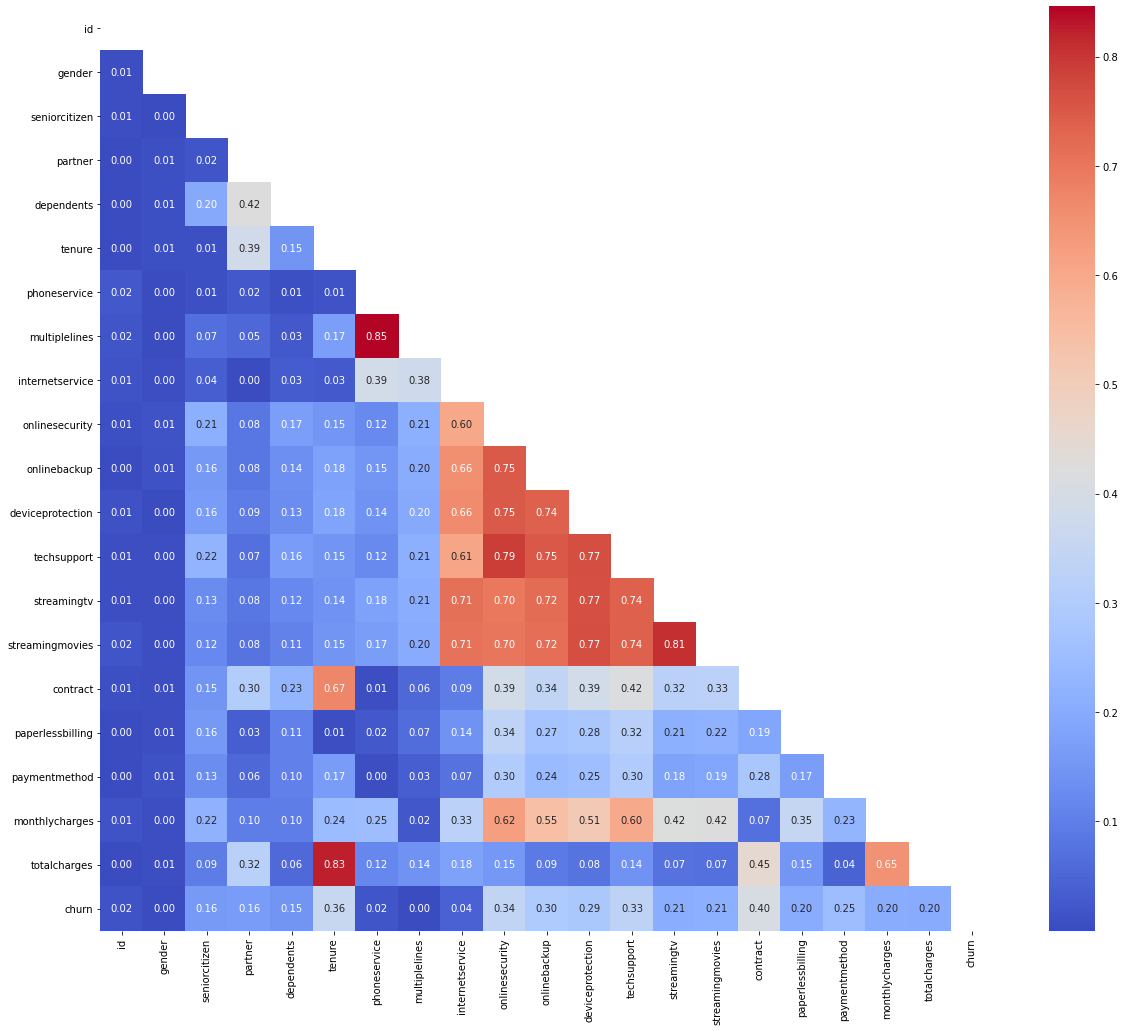

In [41]:
fig, ax = plt.subplots(figsize = (20, 17)) 
mask = np.zeros_like(df_corr.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_corr.corr().abs(), mask = mask, ax = ax, cmap ='coolwarm', annot = True, fmt = '.2f')

In [42]:
set_variaveis_corr = set()
matrix_corr = df_corr.corr()
matrix_corr

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
id,1.000000,0.005947,-0.005344,0.001929,0.002239,0.002524,-0.024654,0.019656,0.013340,-0.007640,0.001144,-0.012485,0.006038,-0.005187,-0.016632,-0.009322,-0.002960,-0.000462,-0.013354,-0.003117,0.015188
gender,0.005947,1.000000,0.002990,0.007471,-0.008359,-0.008574,0.001033,-0.000008,-0.004472,0.013724,0.012206,0.000850,0.004716,0.004294,0.004361,0.005028,0.005634,-0.010922,0.003511,-0.005655,0.000797
seniorcitizen,-0.005344,0.002990,1.000000,0.018942,-0.197955,0.007509,0.009136,0.067751,0.035025,-0.211735,-0.157197,-0.163074,-0.223671,-0.128453,-0.122026,0.146374,0.155394,-0.130077,0.215351,0.093825,0.161488
partner,0.001929,0.007471,0.018942,1.000000,0.424996,0.386215,0.024696,0.053151,0.002202,0.084042,0.084194,0.092959,0.072545,0.084551,0.076027,-0.304246,-0.033213,0.055891,0.096741,0.319301,-0.164049
dependents,0.002239,-0.008359,-0.197955,0.424996,1.000000,0.146342,0.009388,-0.025156,-0.031273,0.169746,0.135362,0.131754,0.163162,0.120999,0.106257,-0.225672,-0.105519,0.104699,-0.096580,0.057217,-0.147005
tenure,0.002524,-0.008574,0.007509,0.386215,0.146342,1.000000,0.013955,0.170159,0.028083,0.151206,0.177515,0.184937,0.148388,0.142923,0.147405,-0.672333,-0.006489,0.165075,0.244726,0.825807,-0.358069
phoneservice,-0.024654,0.001033,0.009136,0.024696,0.009388,0.013955,1.000000,-0.845965,-0.387146,0.123977,0.150134,0.143173,0.124538,0.175616,0.167493,-0.006371,0.023651,-0.004002,0.248876,0.116320,0.019574
multiplelines,0.019656,-0.000008,0.067751,0.053151,-0.025156,0.170159,-0.845965,1.000000,0.379822,-0.214000,-0.204830,-0.195676,-0.214463,-0.206797,-0.199850,-0.055223,0.065518,-0.033667,0.020536,0.142393,0.001981
internetservice,0.013340,-0.004472,0.035025,0.002202,-0.031273,0.028083,-0.387146,0.379822,1.000000,-0.603406,-0.656597,-0.661955,-0.610719,-0.713739,-0.708944,0.092882,0.140747,-0.072912,0.325458,0.177609,0.041798
onlinesecurity,-0.007640,0.013724,-0.211735,0.084042,0.169746,0.151206,0.123977,-0.214000,-0.603406,1.000000,0.747169,0.746846,0.791255,0.700284,0.703560,-0.388265,-0.336868,0.299409,-0.623441,-0.152117,-0.342879


In [43]:
for i in range(len(matrix_corr.columns)):
    for j in range(i):
        if abs(matrix_corr.iloc[i, j]) > 0.8:
            colname = matrix_corr.columns[i]
            set_variaveis_corr.add(colname)

set_variaveis_corr

{'multiplelines', 'streamingmovies', 'totalcharges'}

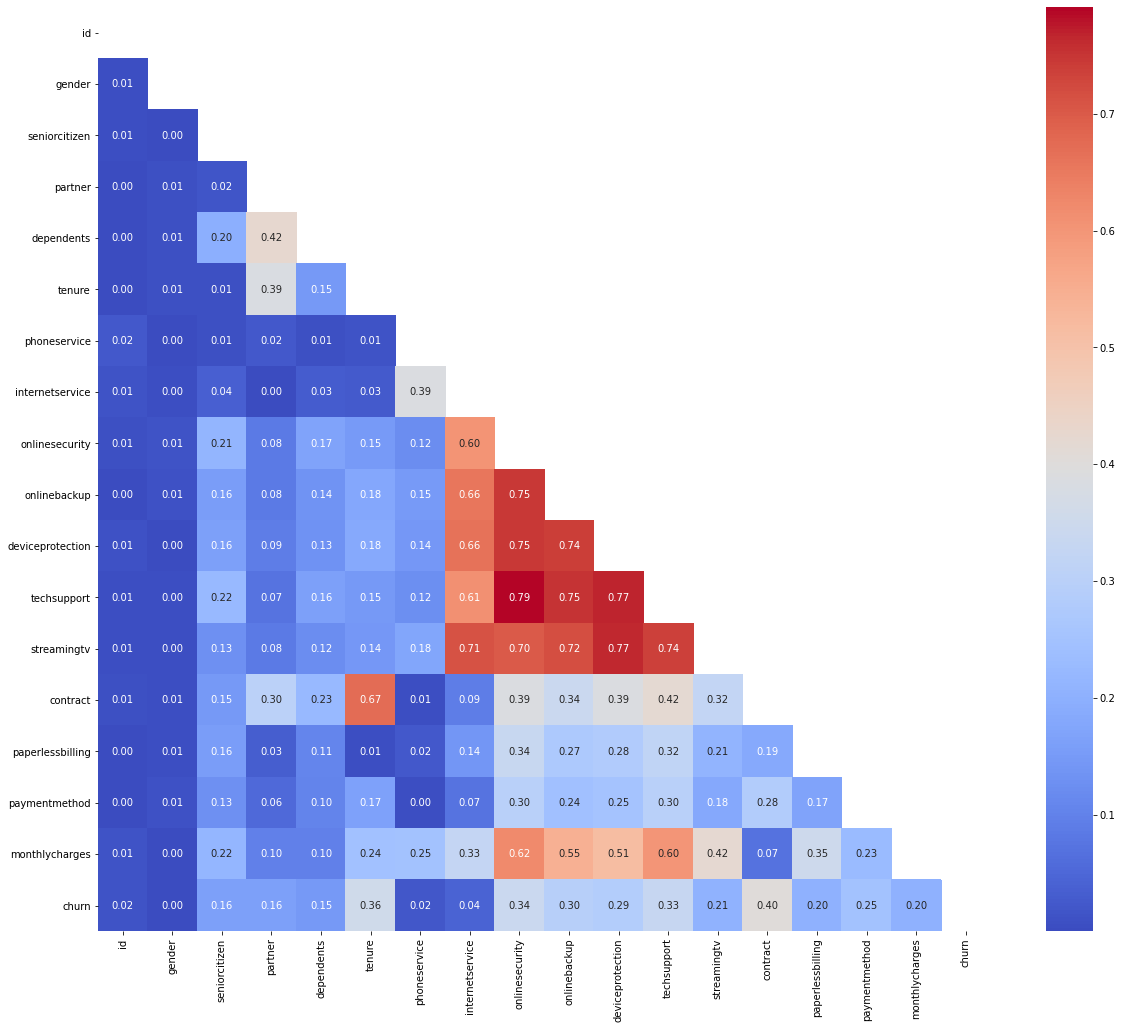

In [44]:
df_corr = df_corr.drop(set_variaveis_corr, axis = 1)

fig, ax = plt.subplots(figsize = (20, 17)) 
mask = np.zeros_like(df_corr.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_corr.corr().abs(), mask = mask, ax = ax, cmap='coolwarm', annot = True, fmt = '.2f')

In [45]:
df_corr.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,contract,paperlessbilling,paymentmethod,monthlycharges,churn
0,4030,1,0,0,0,56.0,0,2,1,1,1,1,0,0,0,4,45.05,0
1,6731,0,0,1,1,17.0,1,0,2,2,2,2,2,1,0,3,19.65,0
2,6479,1,0,1,0,60.0,1,1,0,1,1,1,1,0,1,4,110.80,0
3,6861,1,0,0,0,37.0,1,1,0,1,1,0,1,2,1,2,101.90,1
4,3266,0,0,1,1,29.0,1,1,0,0,0,0,0,2,1,1,70.75,1


In [62]:
df_corr_treino = df_corr.copy()

In [63]:
modelo = smf.glm(formula = 'churn ~ seniorcitizen + partner  +	tenure +	phoneservice +	internetservice +	onlinesecurity  + onlinebackup + 	techsupport +	streamingtv	+ contract	+ paperlessbilling +	paymentmethod	+ monthlycharges',
                 data = df_corr_treino, family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5620
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2301.4
Date:                Mon, 09 Nov 2020   Deviance:                       4602.8
Time:                        12:43:28   Pearson chi2:                 5.62e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5410      0.350  

In [69]:
df_corr_treino

,id,seniorcitizen,partner,tenure,phoneservice,internetservice,onlinesecurity,onlinebackup,techsupport,streamingtv,contract,paperlessbilling,paymentmethod,monthlycharges,churn
0,4030,0,0,56.0,0,2,1,1,1,0,0,0,4,45.05,0
1,6731,0,1,17.0,1,0,2,2,2,2,1,0,3,19.65,0
2,6479,0,1,60.0,1,1,0,1,1,1,0,1,4,110.80,0
3,6861,0,0,37.0,1,1,0,1,0,1,2,1,2,101.90,1
4,3266,0,1,29.0,1,1,0,0,0,0,2,1,1,70.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,0,0,43.0,0,2,0,0,1,0,1,0,1,44.15,0
5630,604,0,0,45.0,1,1,0,1,1,1,0,0,1,108.65,0
5631,4803,0,0,28.0,1,2,0,1,1,0,2,0,2,54.65,0
5632,6317,0,1,63.0,1,0,2,2,2,2,0,0,3,25.25,0


In [70]:
from sklearn.model_selection import train_test_split

In [74]:
preditoras = df_corr_treino.copy()
preditoras.drop(columns = 'churn', inplace=True)
target = df_corr_treino['churn']

In [75]:
i_CV = 10 # Número de Cross-Validations
f_Test_Size = 0.25 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(preditoras, target, test_size = f_Test_Size)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_pred = logreg.predict(X_test)

In [78]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [79]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.812


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1028
           1       0.67      0.50      0.57       381

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [86]:
def funcao_cross_val_score(modelo, X_treinamento, y_treinamento, CV):
    # versão com sklearn.model_selection.cross_validate:
    #a_scores_CV = cross_validate(modelo, X_treinamento, y_treinamento, cv = CV, scoring = metodo)
    #print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    #print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    #return a_scores_CV

    #versão com cross_val_score::
    a_scores_CV = cross_val_score(modelo, X_treinamento, y_treinamento, cv = CV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    return a_scores_CV

###XXGB

In [87]:
from xgboost import XGBClassifier
import xgboost as xgb

# Instancia...
ml_XGB = XGBClassifier(silent = False, 
                       scale_pos_weight=1,
                       learning_rate=0.01,  
                       colsample_bytree = 1,
                       subsample = 0.8,
                       objective='binary:logistic', 
                       n_estimators=1000, 
                       reg_alpha = 0.3,
                       max_depth= 3, 
                       gamma=1, 
                       max_delta_step=5)

In [89]:
ml_XGB.fit(X_train, y_train)

[13:12:28] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=5, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [91]:
# Cross-Validation com 10 folds
a_scores_CV = funcao_cross_val_score(ml_XGB, X_train, y_train, i_CV)

[13:12:59] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:13:01] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:13:03] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:13:06] WARNING: ..

In [92]:
print(f'Acurácias: {a_scores_CV}')

Acurácias: [0.8108747  0.8108747  0.84160757 0.8179669  0.80851064 0.78436019
 0.8056872  0.83886256 0.79383886 0.81042654]


In [95]:
y_pred = ml_XGB.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
from sklearn.metrics import confusion_matrix

In [102]:
def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

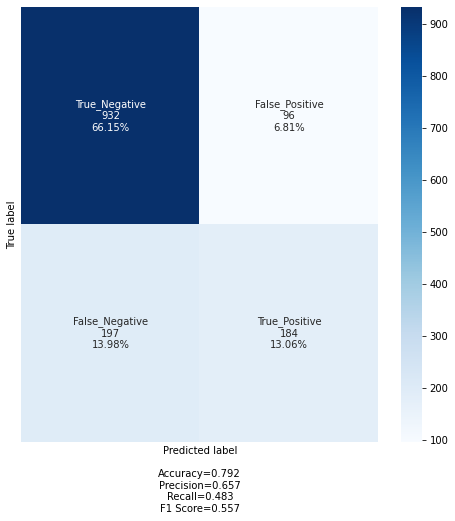

In [103]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_labels = ['True_Negative','False_Positive','False_Negative','True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories)

In [ ]:
#parameter tune


In [ ]:
# Dicionário de Hiperparâmetros para XGBoost:
d_hiperparametros_XGB = {'min_child_weight': [1,2],
                'gamma': [0.1, 0.5],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'max_depth': [4, 5, 7],
                'learning_rate': [0.01, 0.02, 0.07, 0.1]}

#####tratar test

In [ ]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/test.csv'
df_churn_test = pd.read_csv(url)
df_churn_test

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4897,Male,0,No,NaN,24.0,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.8
1405,6940,Male,0,No,No,35.0,Yes,No,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3
1406,804,Female,0,Yes,No,46.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),64.20,3009.5
1407,1143,Male,1,Yes,Yes,11.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.20,775.3


In [ ]:
#Normalizar as colunas
df_churn_test.columns = [col.lower() for col in df_churn_test.columns]
df_churn_test.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [ ]:
df_churn_test['dependents'].fillna('Yes', inplace=True)

In [ ]:
df_churn_test['paymentmethod'].fillna('Credit card (automatic)', inplace=True)

In [ ]:
df_churn_test['totalcharges'] = df_churn_test['totalcharges'].str.replace(',', '.')
df_churn_test['totalcharges'] = pd.to_numeric(df_churn_test['totalcharges'], errors= 'coerce')

In [ ]:
df_churn_test[['totalcharges']].isna().sum()

totalcharges    3
dtype: int64

In [ ]:
df_churn_test['tenure'].isna().sum()

118

In [ ]:
#atenção

In [ ]:
df_churn_test['tenure_esti']=round(df_churn_test['totalcharges']/df_churn_train['monthlycharges'],2)

In [ ]:
df_churn_test['tenure_rou']=round(df_churn_test['tenure_esti'])

In [ ]:
l_tot_ten = list(df_churn_test[df_churn_test['tenure'].isna()].index)
l_tot_ten

[8,
 15,
 32,
 38,
 41,
 54,
 69,
 82,
 113,
 117,
 118,
 125,
 149,
 172,
 173,
 185,
 193,
 213,
 238,
 246,
 268,
 277,
 287,
 295,
 318,
 324,
 339,
 351,
 355,
 363,
 377,
 417,
 467,
 476,
 483,
 487,
 495,
 498,
 511,
 513,
 516,
 517,
 518,
 561,
 562,
 563,
 573,
 599,
 624,
 629,
 635,
 638,
 641,
 654,
 660,
 662,
 669,
 677,
 678,
 728,
 729,
 734,
 740,
 747,
 764,
 765,
 791,
 796,
 805,
 817,
 820,
 827,
 835,
 842,
 861,
 888,
 897,
 910,
 912,
 918,
 925,
 926,
 928,
 952,
 953,
 958,
 973,
 979,
 987,
 1009,
 1012,
 1022,
 1034,
 1045,
 1051,
 1069,
 1107,
 1159,
 1163,
 1169,
 1173,
 1189,
 1200,
 1213,
 1222,
 1224,
 1254,
 1276,
 1303,
 1310,
 1325,
 1344,
 1367,
 1368,
 1385,
 1387,
 1389,
 1394]

In [ ]:
for i in l_tot_ten:
    df_churn_test['tenure'][i] = df_churn_test['tenure_rou'][i]


In [ ]:
df_churn_test.drop(columns=['tenure_esti','tenure_rou'], inplace=True)

In [ ]:
l_index_charg = list(df_churn_test[df_churn_test['totalcharges'].isna()].index)
l_index_charg

[313, 1063, 1297]

In [ ]:
df_churn_test[['tenure','totalcharges']][313:314]

,tenure,totalcharges
313,0.0,NaN


In [ ]:
for i in l_index_charg:
    df_churn_test['totalcharges'][i] = 0.0

In [ ]:
df_churn_test.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [ ]:
df_churn_test['totalcharges'][313]

0.0

In [ ]:
df_churn_test.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
df_churn_test.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_test.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_test.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
df_churn_test.internetservice.replace(['Fiber optic', 'DSL', 'No'], [1,2,0], inplace=True)
df_churn_test.paymentmethod.replace(['Electronic check', 'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)'], [1,2,3,4], inplace=True)
df_churn_test.contract.replace(['Two year', 'One year', 'Month-to-month'], [0,1,2], inplace=True)
df_churn_test.multiplelines.replace(['No', 'Yes', 'No phone service'], [0,1,3], inplace=True)
df_churn_test.onlinesecurity.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 
df_churn_test.onlinebackup.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.deviceprotection.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.techsupport.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.streamingtv.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.streamingmovies.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 


In [ ]:
df_churn_test.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
df_churn_test.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [ ]:
l_index_charg1 = list(df_churn_test[df_churn_test['totalcharges'].isna()].index)
l_index_charg1

[]

In [ ]:
df_churn_test.iloc[313:314]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
313,4381,1,0,1,1,0.0,1,0,0,2,2,2,2,2,2,0,0,3,20.0,0.0


In [ ]:
for i in l_index_charg:
    df_churn_train['totalcharges'][i] = 0.0

AttributeError: ignored

In [ ]:
'''['multiplelines',
 'streamingmovies',
 'streamingtv',
 'techsupport',
 'totalcharges']

In [ ]:
df_corr_test = df_churn_test.copy()

AttributeError: ignored

In [ ]:
df_corr_test = df_corr_test.drop(columns =['multiplelines', 'streamingmovies', 'totalcharges'], inplace =True)

###drop no treino

In [ ]:
df_corr_treino

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,contract,paperlessbilling,paymentmethod,monthlycharges,churn
0,4030,1,0,0,0,56.0,0,2,1,1,1,1,0,0,0,4,45.05,0
1,6731,0,0,1,1,17.0,1,0,2,2,2,2,2,1,0,3,19.65,0
2,6479,1,0,1,0,60.0,1,1,0,1,1,1,1,0,1,4,110.80,0
3,6861,1,0,0,0,37.0,1,1,0,1,1,0,1,2,1,2,101.90,1
4,3266,0,0,1,1,29.0,1,1,0,0,0,0,0,2,1,1,70.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,0,0,0,0,43.0,0,2,0,0,1,1,0,1,0,1,44.15,0
5630,604,0,0,0,0,45.0,1,1,0,1,1,1,1,0,0,1,108.65,0
5631,4803,1,0,0,0,28.0,1,2,0,1,0,1,0,2,0,2,54.65,0
5632,6317,0,0,1,1,63.0,1,0,2,2,2,2,2,0,0,3,25.25,0


###automl

In [ ]:
clf = setup(data = df_corr_treino,
            target = 'churn',
            #numeric_features = ['tenure', 'monthlycharges', 'totalcharges'] 
            #numeric_imputation = 'mean'
            categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
            'phoneservice', 'internetservice', 'onlinesecurity',
            'onlinebackup', 'deviceprotection',
            'contract', 'paperlessbilling', 'paymentmethod'], # lista das variáveis categóricas
            ignore_features = ['id'], 
            silent = False)

,Description,Value
0,session_id,3744
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5634, 18)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8126,0.0000,0.7183,0.8032,0.8041,0.4720,0.4792,0.018
lr,Logistic Regression,0.8118,0.8511,0.7280,0.8045,0.8061,0.4819,0.4860,0.580
gbc,Gradient Boosting Classifier,0.8118,0.8515,0.7267,0.8041,0.8056,0.4800,0.4844,0.408
catboost,CatBoost Classifier,0.8098,0.8429,0.7234,0.8014,0.8034,0.4737,0.4777,2.946
lda,Linear Discriminant Analysis,0.8083,0.8471,0.7281,0.8017,0.8036,0.4774,0.4800,0.032
ada,Ada Boost Classifier,0.8080,0.8531,0.7254,0.8010,0.8027,0.4739,0.4773,0.195
lightgbm,Light Gradient Boosting Machine,0.8034,0.8389,0.7214,0.7962,0.7985,0.4635,0.4660,0.107
rf,Random Forest Classifier,0.7986,0.8241,0.7012,0.7873,0.7897,0.4333,0.4391,0.666
xgboost,Extreme Gradient Boosting,0.7885,0.8242,0.7042,0.7813,0.7838,0.4254,0.4273,0.790
knn,K Neighbors Classifier,0.7826,0.7783,0.6962,0.7751,0.7776,0.4089,0.4110,0.135


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3744,
                solver='auto', tol=0.001)

In [ ]:
lr = create_model('lr') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8329,0.8745,0.7500,0.8257,0.8266,0.5341,0.5395
1,0.7924,0.8231,0.7195,0.7886,0.7903,0.4475,0.4479
2,0.8481,0.8908,0.7666,0.8421,0.8417,0.5735,0.5807
3,0.8274,0.8435,0.7607,0.8234,0.8250,0.5353,0.5361
4,0.8071,0.8555,0.7168,0.7976,0.7998,0.4631,0.4678
5,0.8071,0.8681,0.7295,0.8007,0.8030,0.4773,0.4789
6,0.8173,0.8517,0.7300,0.8086,0.8104,0.4913,0.4963
7,0.8249,0.8572,0.7256,0.8159,0.8145,0.4971,0.5086
8,0.7766,0.8334,0.6866,0.7676,0.7710,0.3907,0.3926
9,0.7843,0.8128,0.6950,0.7751,0.7784,0.4095,0.4118


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8329,0.8745,0.7500,0.8257,0.8266,0.5341,0.5395
1,0.7924,0.8231,0.7195,0.7886,0.7903,0.4475,0.4479
2,0.8481,0.8908,0.7666,0.8421,0.8417,0.5735,0.5807
3,0.8274,0.8433,0.7607,0.8234,0.8250,0.5353,0.5361
4,0.8096,0.8558,0.7185,0.8001,0.8020,0.4683,0.4736
5,0.8046,0.8681,0.7278,0.7985,0.8008,0.4722,0.4735
6,0.8173,0.8517,0.7300,0.8086,0.8104,0.4913,0.4963
7,0.8249,0.8572,0.7256,0.8159,0.8145,0.4971,0.5086
8,0.7766,0.8331,0.6866,0.7676,0.7710,0.3907,0.3926
9,0.7843,0.8127,0.6950,0.7751,0.7784,0.4095,0.4118


In [ ]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8228,0.0,0.7304,0.8139,0.8145,0.4990,0.5065
1,0.7975,0.0,0.7133,0.7896,0.7924,0.4466,0.4487
2,0.8532,0.0,0.7636,0.8483,0.8448,0.5790,0.5914
3,0.8096,0.0,0.7228,0.8012,0.8036,0.4716,0.4750
4,0.8198,0.0,0.7253,0.8105,0.8109,0.4897,0.4978
5,0.8020,0.0,0.7101,0.7921,0.7945,0.4489,0.4535
6,0.8122,0.0,0.7106,0.8014,0.8015,0.4625,0.4724
7,0.8198,0.0,0.7158,0.8101,0.8082,0.4789,0.4918
8,0.7944,0.0,0.6923,0.7820,0.7843,0.4178,0.4247
9,0.7944,0.0,0.6986,0.7834,0.7862,0.4258,0.4306


In [ ]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8228,0.0,0.7304,0.8139,0.8145,0.4990,0.5065
1,0.7975,0.0,0.7133,0.7896,0.7924,0.4466,0.4487
2,0.8506,0.0,0.7587,0.8456,0.8418,0.5703,0.5834
3,0.8096,0.0,0.7228,0.8012,0.8036,0.4716,0.4750
4,0.8198,0.0,0.7253,0.8105,0.8109,0.4897,0.4978
5,0.8020,0.0,0.7101,0.7921,0.7945,0.4489,0.4535
6,0.8096,0.0,0.7057,0.7984,0.7984,0.4534,0.4638
7,0.8198,0.0,0.7158,0.8101,0.8082,0.4789,0.4918
8,0.7944,0.0,0.6923,0.7820,0.7843,0.4178,0.4247
9,0.7944,0.0,0.6986,0.7834,0.7862,0.4258,0.4306


In [ ]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8278,0.0,0.7441,0.8202,0.8208,0.5239,0.5302
1,0.8203,0.0,0.7359,0.8121,0.8133,0.5045,0.5100
2,0.7975,0.0,0.7019,0.7862,0.7883,0.4361,0.4425
3,0.8122,0.0,0.7192,0.8024,0.8035,0.4740,0.4811
4,0.8147,0.0,0.6989,0.8052,0.7989,0.4533,0.4740
5,0.8147,0.0,0.7366,0.8076,0.8098,0.4965,0.4992
6,0.7970,0.0,0.7120,0.7884,0.7911,0.4464,0.4492
7,0.8274,0.0,0.7563,0.8215,0.8232,0.5358,0.5383
8,0.7843,0.0,0.6869,0.7720,0.7750,0.4024,0.4078
9,0.8350,0.0,0.7523,0.8281,0.8279,0.5430,0.5503


In [ ]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8304,0.0,0.7459,0.8229,0.8231,0.5293,0.5364
1,0.8177,0.0,0.7311,0.8091,0.8103,0.4959,0.5019
2,0.8000,0.0,0.7067,0.7893,0.7914,0.4450,0.4509
3,0.8122,0.0,0.7192,0.8024,0.8035,0.4740,0.4811
4,0.8147,0.0,0.6989,0.8052,0.7989,0.4533,0.4740
5,0.8173,0.0,0.7383,0.8100,0.8120,0.5018,0.5049
6,0.7970,0.0,0.7120,0.7884,0.7911,0.4464,0.4492
7,0.8249,0.0,0.7515,0.8186,0.8203,0.5274,0.5303
8,0.7868,0.0,0.6887,0.7744,0.7771,0.4075,0.4134
9,0.8350,0.0,0.7523,0.8281,0.8279,0.5430,0.5503


In [ ]:
predic = predict_model(tuned_ridge, data = df_churn_test)
predic

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,Label
0,0,0,1,1,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30,0
1,0,1,1,1,61.0,1,1,1,0,1,0,0,1,1,1,0,4,99.00,5969.30,0
2,0,0,0,0,36.0,1,1,1,0,0,0,0,0,1,2,1,1,84.75,3050.15,1
3,1,0,1,1,61.0,0,3,2,0,1,1,1,1,1,0,1,2,61.45,3751.15,0
4,1,0,0,0,47.0,1,0,0,2,2,2,2,2,2,0,1,3,20.55,945.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,0,1,24.0,1,0,2,0,0,1,0,0,0,2,1,3,49.70,1167.80,0
1405,0,0,0,0,35.0,1,0,1,1,0,0,1,0,1,1,1,1,89.20,3251.30,0
1406,1,0,1,0,46.0,1,0,2,0,1,0,1,1,0,0,1,4,64.20,3009.50,0
1407,0,1,1,1,11.0,1,1,1,0,0,0,0,0,0,2,1,4,75.20,775.30,1


In [ ]:
predic['Score'].mean()

KeyError: ignored

In [ ]:
pred_val = predic['Label']

In [ ]:
from google.colab import files

In [ ]:
ids = df_churn_test['id']
output = pd.DataFrame({'id': ids, 'Churn': pred_val})
output.to_csv('submission32rid.csv', index=False)
files.download('submission32rid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>